In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [38]:
db=pd.read_csv("../Dataset/heart_disease_data.csv")

In [39]:
db.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
db.shape

(303, 14)

In [41]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [42]:
db.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


C:\Users\vivek kumar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


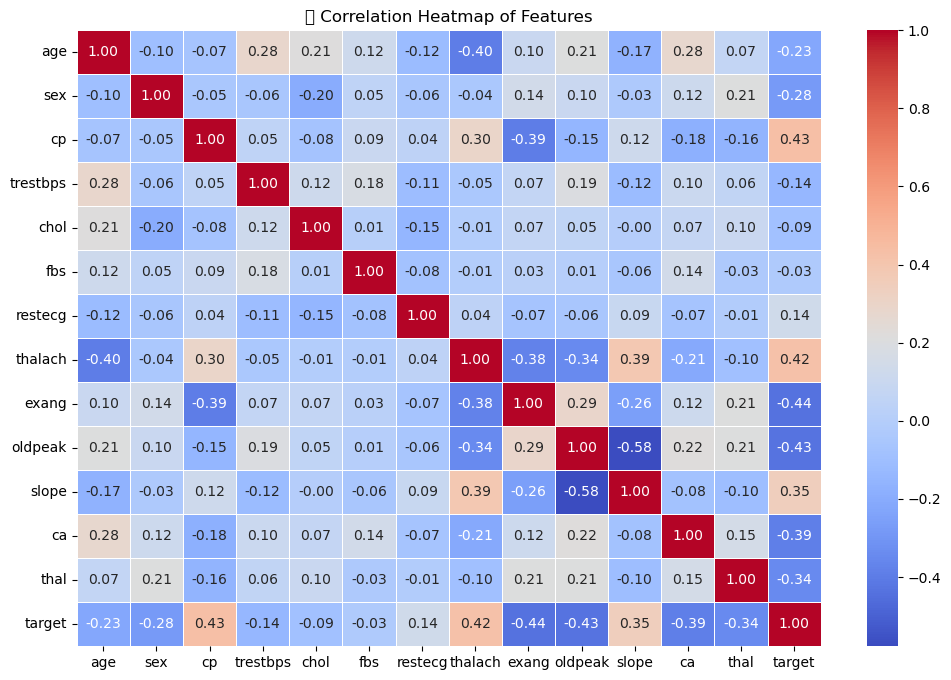

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is 'db'
plt.figure(figsize=(12, 8))
corr_matrix = db.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔍 Correlation Heatmap of Features")
plt.show()


In [44]:
X=db.drop(columns="target", axis=1)
y=db["target"]

In [45]:
scaler=StandardScaler()
scaler_X=scaler.fit_transform(X)

In [46]:
X_train,X_test,y_train,y_test=train_test_split(scaler_X,y, test_size=0.2,  stratify=y, random_state=42)

In [47]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [48]:
X_train

array([[ 1.61392956, -1.46841752,  1.97312292, ...,  0.97635214,
         1.24459328, -0.51292188],
       [ 1.28306308,  0.68100522,  0.03203122, ..., -0.64911323,
         2.22410436, -2.14887271],
       [ 0.06988599, -1.46841752, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       ...,
       [-0.37126932, -1.46841752,  1.00257707, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 0.06988599,  0.68100522,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 1.06248543, -1.46841752, -0.93851463, ...,  0.97635214,
        -0.71442887, -0.51292188]])

In [49]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB()
}

In [50]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"📌 {name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))
    results.append((name, acc))

# 5. Display summary
print("\n📊 Accuracy Summary:")
pd.DataFrame(results, columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

📌 Logistic Regression Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61

📌 Decision Tree Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.74      0.61      0.67        28
           1       0.71      0.82      0.76        33

    accuracy                           0.72        61
   macro avg       0.72      0.71      0.71        61
weighted avg       0.72      0.72      0.72        61

📌 Random Forest Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      

,Model,Accuracy
4,Support Vector Machine,0.836066
5,Naive Bayes,0.819672
0,Logistic Regression,0.803279
3,K-Nearest Neighbors,0.803279
2,Random Forest,0.786885
1,Decision Tree,0.721311


In [51]:
import pickle

svc_model = SVC()
svc_model.fit(X_train, y_train)


with open('Heartdieseas.pkl', 'wb') as f:
    pickle.dump(svc_model, f)

# Save the StandardScaler
with open('Heartdieseas_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("✅ Pickle files saved: 'Heartdieseas.pkl' and 'Heartdieseas_scaler.pkl'")

✅ Pickle files saved: 'Heartdieseas.pkl' and 'Heartdieseas_scaler.pkl'


In [52]:

# Load the saved Random Forest model
with open('Heartdieseas.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Make predictions using the loaded model
y_pred = loaded_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Loaded Model Accuracy: {accuracy:.2f}")
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Loaded Model Accuracy: 0.84

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61

